In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv(r'C:\Users\akash\Downloads\TSLA-2.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [30]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3557,2024-08-16,211.149994,219.800003,210.800003,216.119995,216.119995,88765100
3558,2024-08-19,217.070007,222.979996,214.089996,222.720001,222.720001,76435200
3559,2024-08-20,224.880005,228.220001,219.559998,221.100006,221.100006,74001200
3560,2024-08-21,222.669998,224.660004,218.860001,223.270004,223.270004,70146000
3561,2024-08-22,223.820007,224.800003,210.320007,210.660004,210.660004,79337500


In [32]:
df.shape

(3562, 7)

In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3562 entries, 0 to 3561
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3562 non-null   object 
 1   Open       3562 non-null   float64
 2   High       3562 non-null   float64
 3   Low        3562 non-null   float64
 4   Close      3562 non-null   float64
 5   Adj Close  3562 non-null   float64
 6   Volume     3562 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 194.9+ KB


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3562.0,7.614458e+01,1.027046e+02,1.076000e+00,1.165317e+01,1.749333e+01,1.654375e+02,4.114700e+02
High,3562.0,7.781487e+01,1.049870e+02,1.108667e+00,1.195617e+01,1.771300e+01,1.697450e+02,4.144967e+02
Low,3562.0,7.436547e+01,1.002195e+02,9.986670e-01,1.132883e+01,1.720533e+01,1.613650e+02,4.056667e+02
Close,3562.0,7.612683e+01,1.026311e+02,1.053333e+00,1.168050e+01,1.747467e+01,1.662892e+02,4.099700e+02
Adj Close,3562.0,7.612683e+01,1.026311e+02,1.053333e+00,1.168050e+01,1.747467e+01,1.662892e+02,4.099700e+02
Volume,3562.0,9.689694e+07,7.849683e+07,1.777500e+06,4.793858e+07,8.242725e+07,1.226422e+08,9.140820e+08


<Axes: >

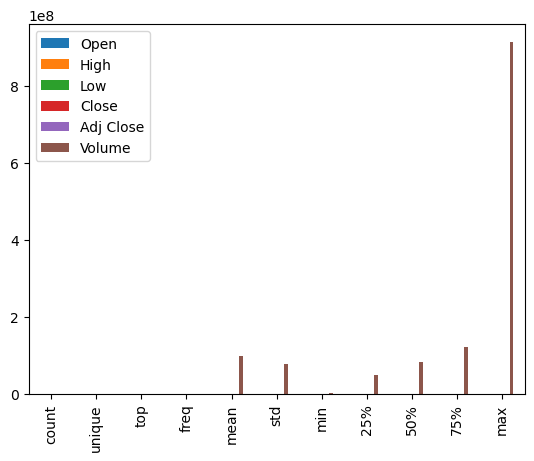

In [38]:
df.describe(include='all').plot(kind='bar')

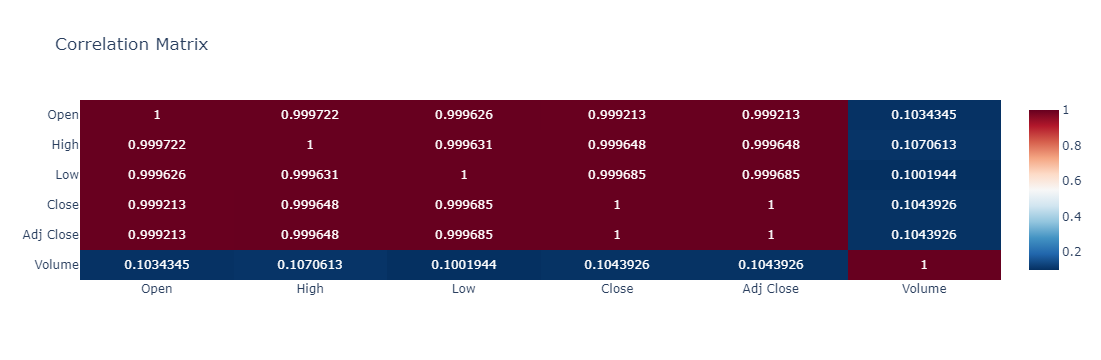

In [40]:
import plotly.express as px
import pandas as pd
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()
fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto",
                title='Correlation Matrix',
                color_continuous_scale='RdBu_r')
fig.show()

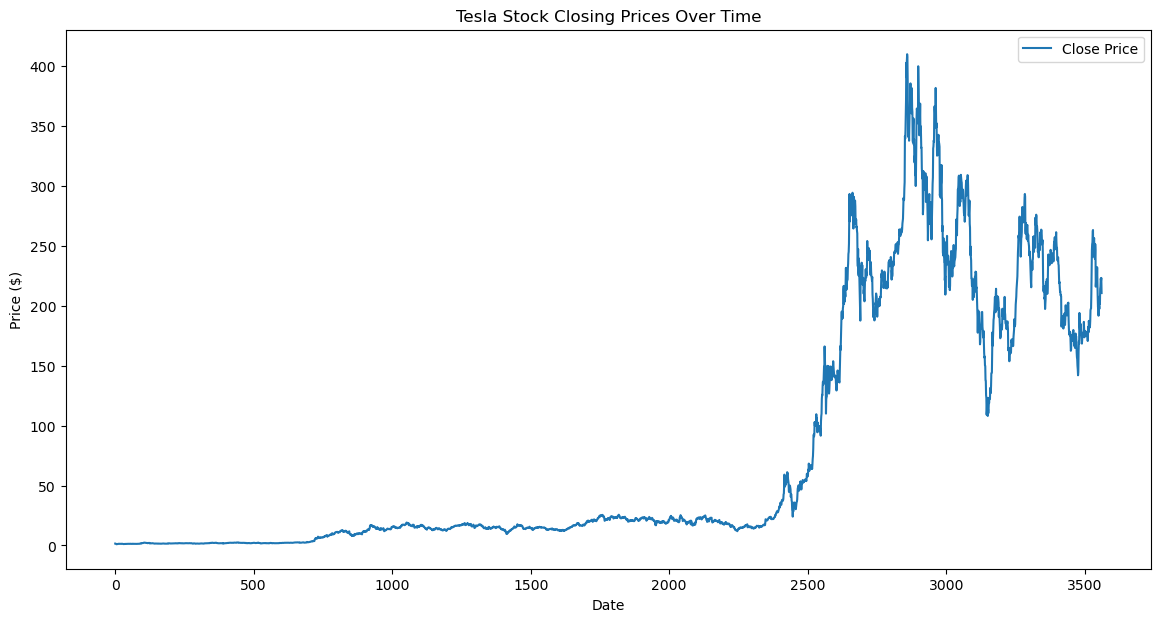

In [42]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.title('Tesla Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

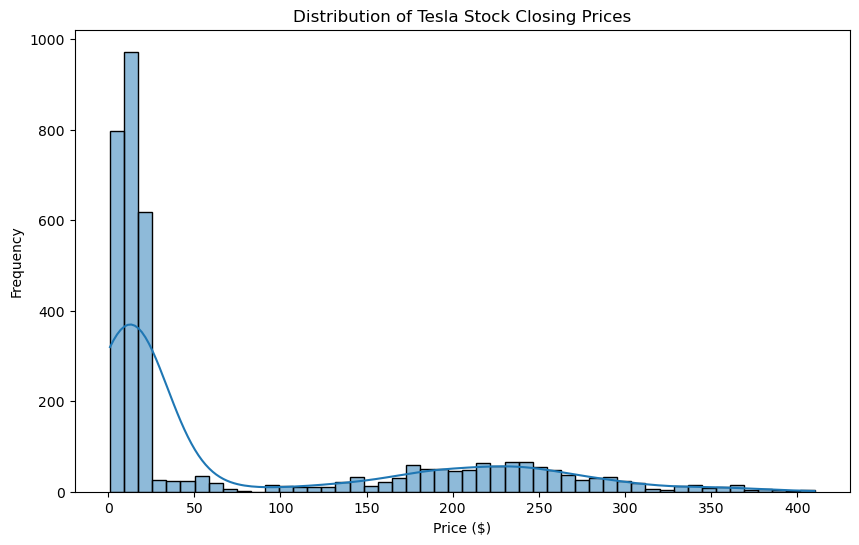

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribution of Tesla Stock Closing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

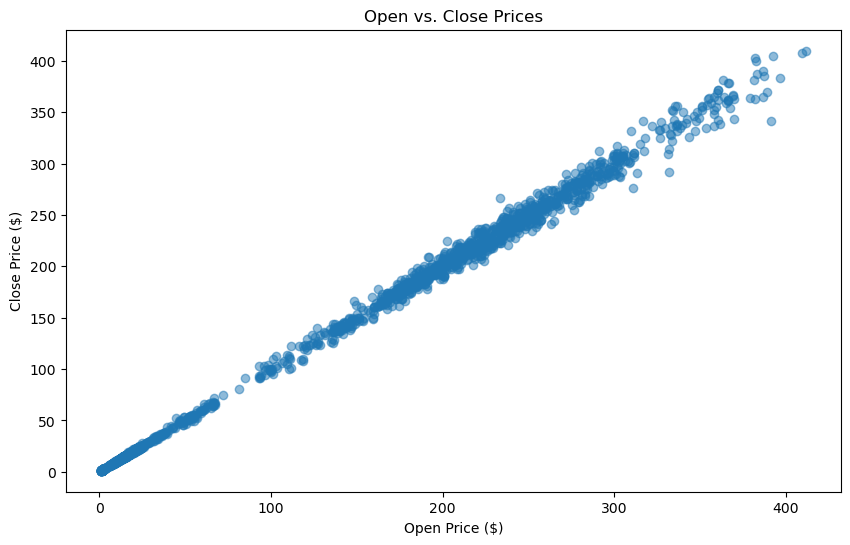

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Open'], df['Close'], alpha=0.5)
plt.title('Open vs. Close Prices')
plt.xlabel('Open Price ($)')
plt.ylabel('Close Price ($)')
plt.show()

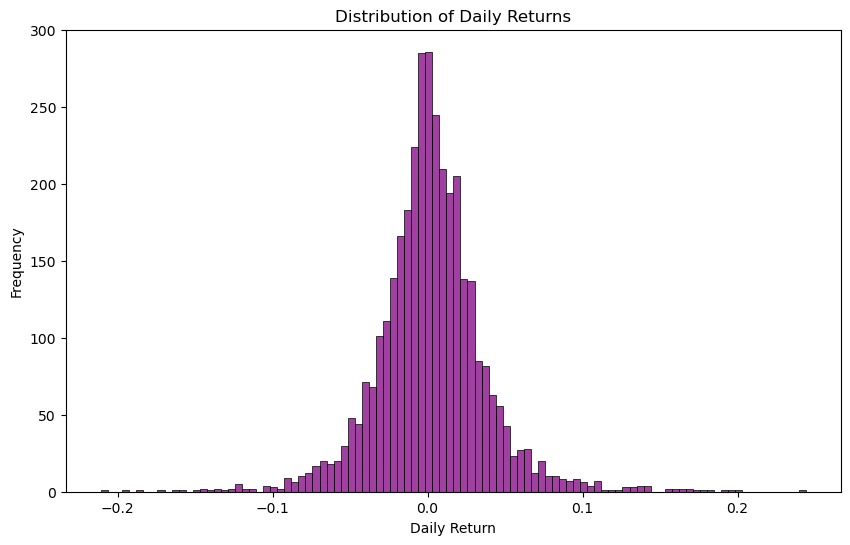

In [48]:
df['Daily Return'] = df['Close'].pct_change()
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily Return'].dropna(), bins=100, color='purple')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

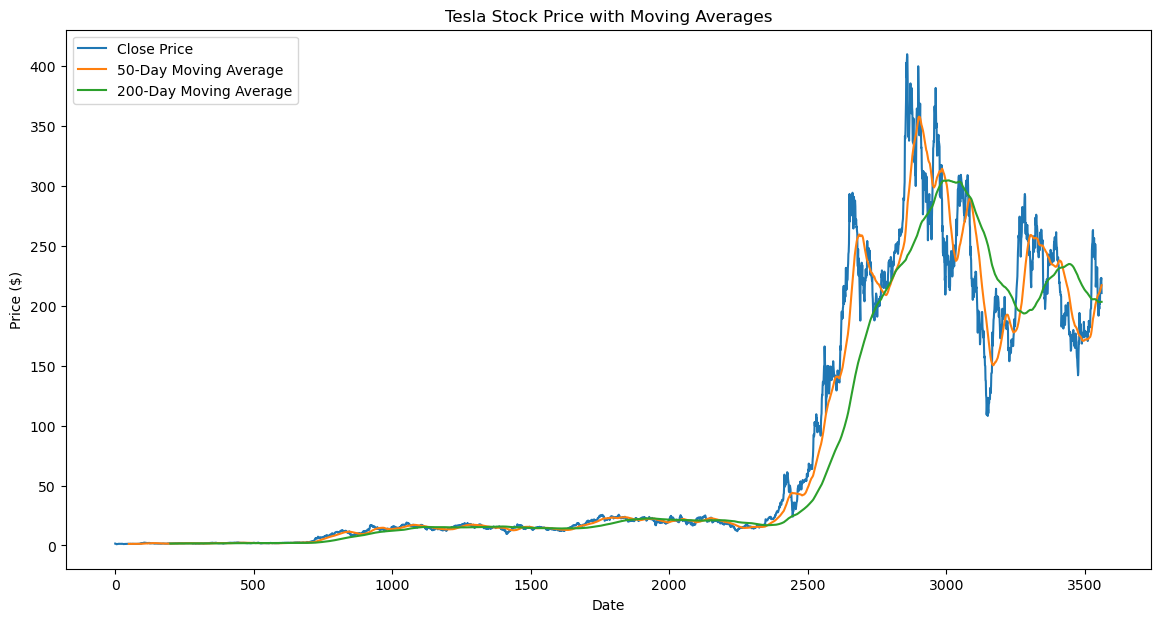

In [50]:
plt.figure(figsize=(14, 7))
df['Close'].plot(label='Close Price')
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()
df['MA50'].plot(label='50-Day Moving Average')
df['MA200'].plot(label='200-Day Moving Average')
plt.title('Tesla Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [54]:
!pip install seaborn

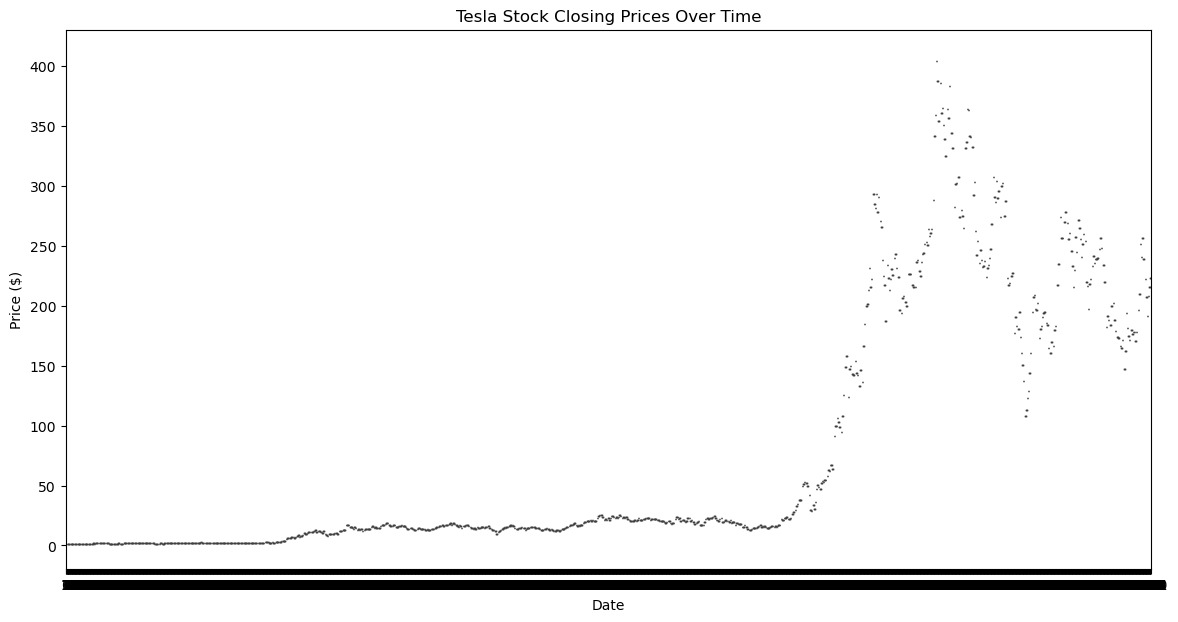

In [59]:
import seaborn as sns

# Create a box plot using Seaborn
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x=df.index, y='Close')
plt.title('Tesla Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.show()

In [60]:
df.columns.tolist()


['Date',
 'Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Daily Return',
 'MA50',
 'MA200']

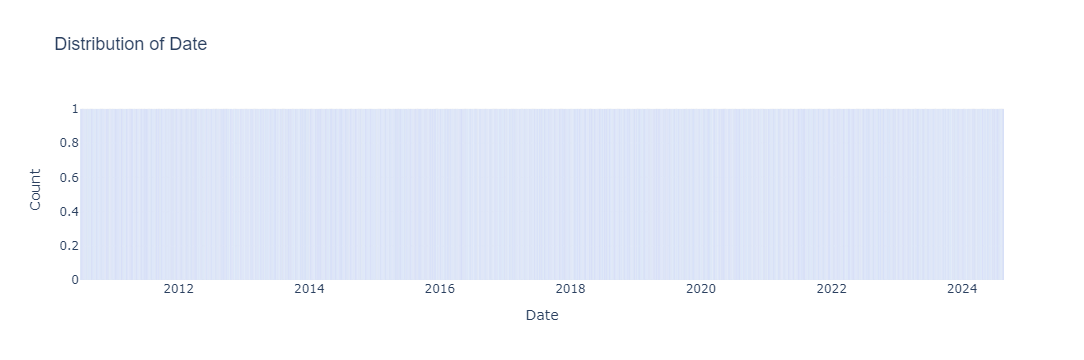

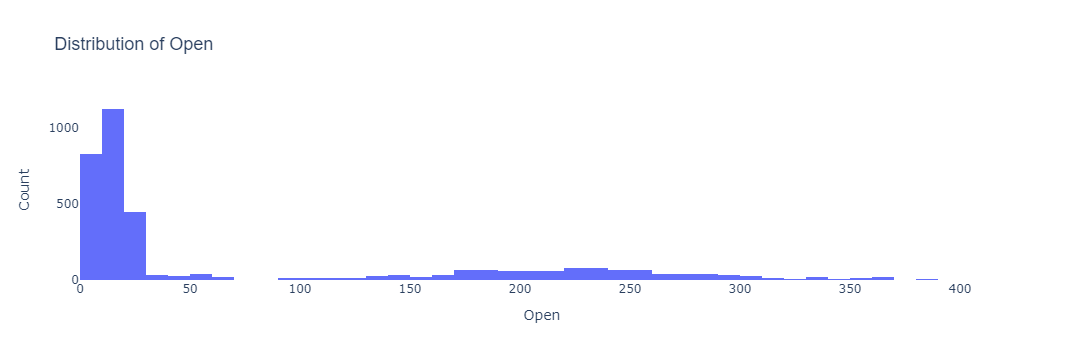

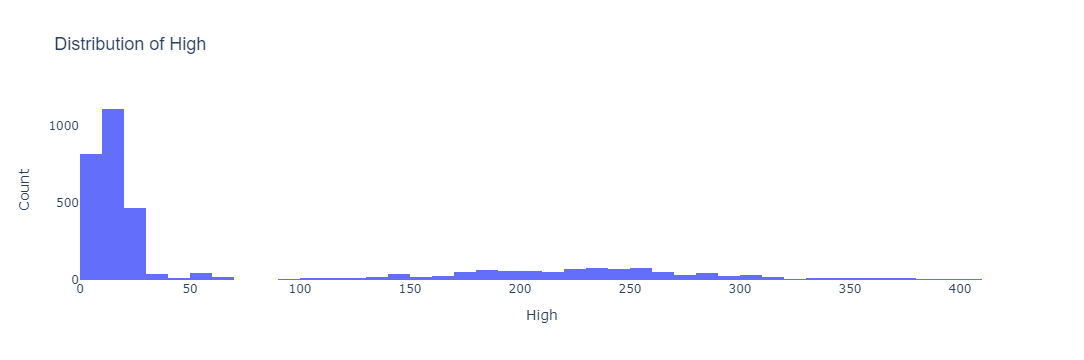

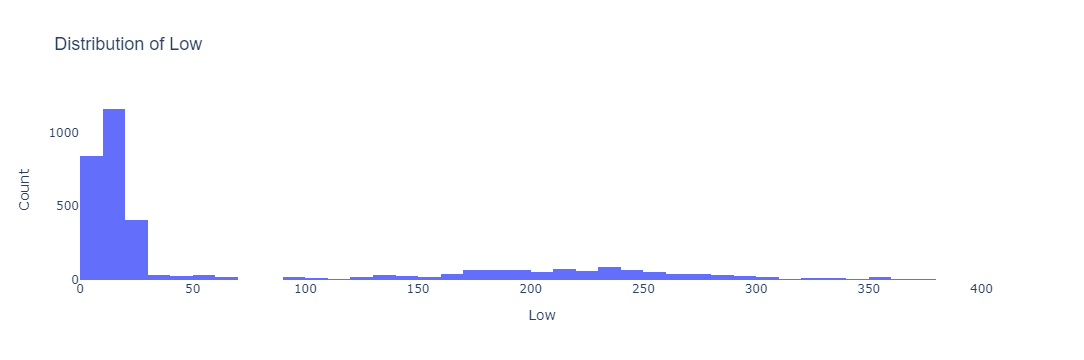

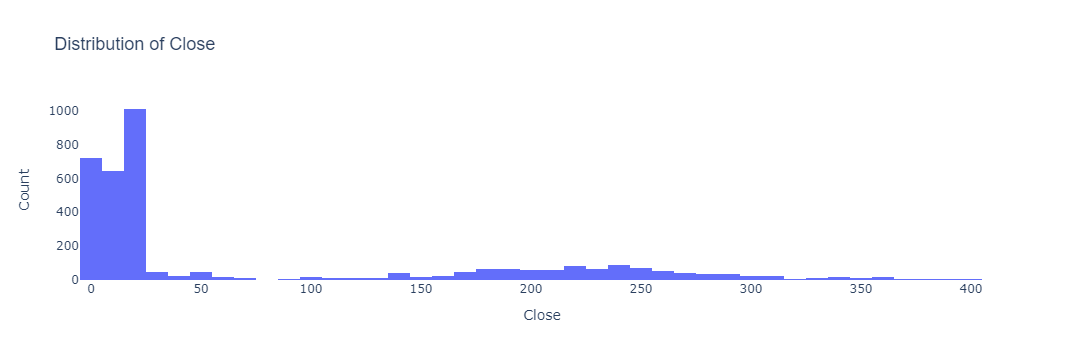

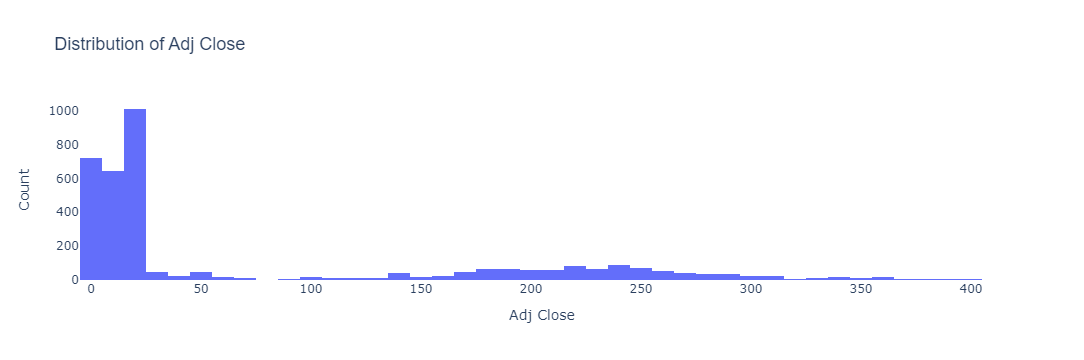

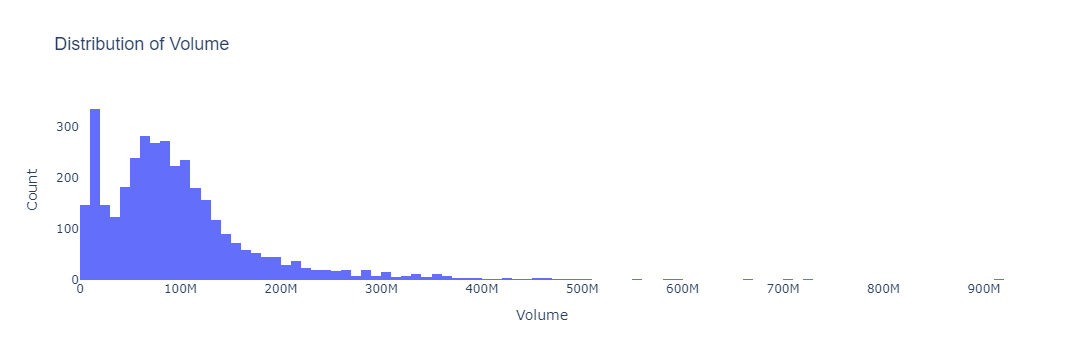

In [63]:
import plotly.express as px
import pandas as pd

# Assuming df is already defined and contains the data

# Define the columns you want to plot
columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Iterate through each column and create a bar chart or histogram
for column in columns:
    try:
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue
        
        # Check if the column is suitable for a bar chart
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']
            
            # Create a bar chart using plotly.express
            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',
               
                labels={column: column, 'count': 'Count'},
                text='count'
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial"),
                 
                xaxis={'categoryorder': 'total descending'}
               

            )
            
            # Show the figure
            fig.show()

        elif df[column].dtype in ['int64', 'float64']:
            # Create a histogram for numerical columns
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'}
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial")
            )
            
            # Show the figure
            fig.show()
    
    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")